In [189]:
import sys
sys.path.append("C:\\Users\josep\Documents\Anaconda\pkgs")
import help_tools
import wave_tools
import cv2
import h5py
from matplotlib import cm

In [204]:
import numpy as np
from wave_tools import ConstructWave, surface_core, peak_tracking
from wave_tools import fft_interpolate, fft_interface
from wave_tools import SpectralAnalysis
import matplotlib.pyplot as plt
from help_tools import plotting_interface

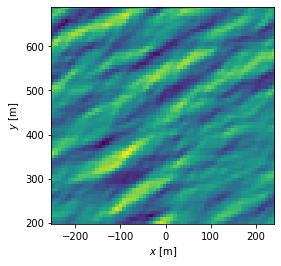

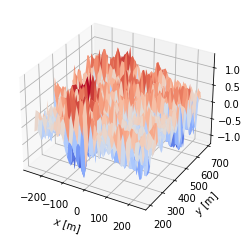

In [3]:
Hs = 2.0
Alpha = 0.023
smax = 70
theta_mean = np.pi/2+30*np.pi/180
gamma = 3.3

dx = 7.5
dy = 7.5
x = np.arange(-250, 245, dx)
y = np.arange(200, 695, dy)

surf2d = ConstructWave.JonswapWave2D(x, y, Hs, Alpha, gamma, theta_mean, smax)
surf2d.plot_3d_as_2d()
surf2d.plot_3d_surface()
plt.show()

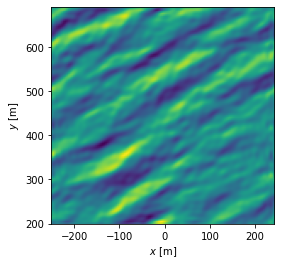

In [4]:
surf2d_interpolated = surf2d.fft_interpolate(2,2)
surf2d_interpolated.plot_3d_as_2d()
plotting_interface.show()

In [5]:
surf2d

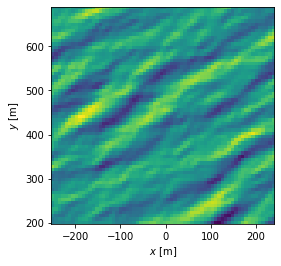

In [6]:
surf2d = ConstructWave.JonswapWave2D(x, y, Hs, Alpha, gamma, theta_mean, smax)
surf2d
surf2d.plot_3d_as_2d()

## Trying my data 

In [157]:
x = f.get('x')
y = f.get('y')

In [158]:
x = np.array(x)
y = np.array(y)

In [159]:
surf3d = surface_core.surface_from_file("shearing_curr_res_7.5_dt_1.0_T_600_U_1.0exp(0.2z)+0.05_psi_30_smax_10_0_surf3d.hdf5")

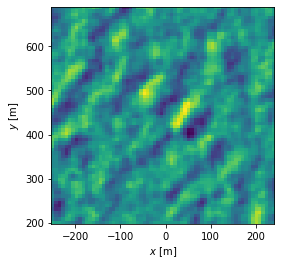

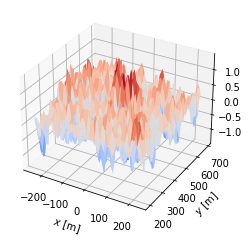

In [160]:
surf3d.plot_3d_as_2d()
surf3d.plot_3d_surface()
plt.show()

In [226]:
k, Uk = surface_core.effective_current_from_file("shearing_curr_res_7.5_dt_1.0_T_600_U_1.0exp(0.2z)+0.05_psi_30_smax_10_0_surf3d.hdf5")

In [191]:
spec3d = surf3d.define_SpectralAnalysis()
spec3d

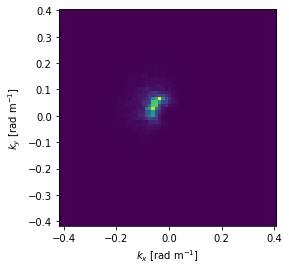

In [165]:
spec3d.plot()

In [192]:
k_limit = 0.4
spec3d_anti_aliased = spec3d.get_anti_aliased_spec3d(k_limit)

In [292]:
spec3d_anti_aliased.kx

array([-0.41887902, -0.40618572, -0.39349241, -0.38079911, -0.36810581,
       -0.3554125 , -0.3427192 , -0.33002589, -0.31733259, -0.30463929,
       -0.29194598, -0.27925268, -0.26655938, -0.25386607, -0.24117277,
       -0.22847947, -0.21578616, -0.20309286, -0.19039955, -0.17770625,
       -0.16501295, -0.15231964, -0.13962634, -0.12693304, -0.11423973,
       -0.10154643, -0.08885313, -0.07615982, -0.06346652, -0.05077321,
       -0.03807991, -0.02538661, -0.0126933 ,  0.        ,  0.0126933 ,
        0.02538661,  0.03807991,  0.05077321,  0.06346652,  0.07615982,
        0.08885313,  0.10154643,  0.11423973,  0.12693304,  0.13962634,
        0.15231964,  0.16501295,  0.17770625,  0.19039955,  0.20309286,
        0.21578616,  0.22847947,  0.24117277,  0.25386607,  0.26655938,
        0.27925268,  0.29194598,  0.30463929,  0.31733259,  0.33002589,
        0.3427192 ,  0.3554125 ,  0.36810581,  0.38079911,  0.39349241,
        0.40618572])

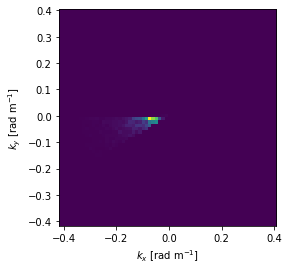

In [193]:
spec3d_anti_aliased.plot()

In [305]:
kx = spec3d.kx
ky = spec3d.ky 
w = spec3d.w
# Calculates kx, ky and w for the spectral domain 

In [307]:
w.shape

(600,)

10 3.131120678077827 299


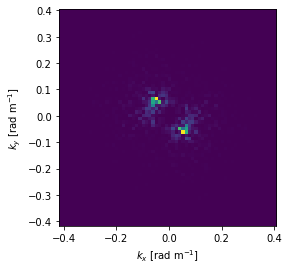

In [310]:
spec3d.plot_w_slice(10)
# Method for 3D, plot kx-ky spectra at a given w

In [252]:
kx

array([-0.41887902, -0.40618572, -0.39349241, -0.38079911, -0.36810581,
       -0.3554125 , -0.3427192 , -0.33002589, -0.31733259, -0.30463929,
       -0.29194598, -0.27925268, -0.26655938, -0.25386607, -0.24117277,
       -0.22847947, -0.21578616, -0.20309286, -0.19039955, -0.17770625,
       -0.16501295, -0.15231964, -0.13962634, -0.12693304, -0.11423973,
       -0.10154643, -0.08885313, -0.07615982, -0.06346652, -0.05077321,
       -0.03807991, -0.02538661, -0.0126933 ,  0.        ,  0.0126933 ,
        0.02538661,  0.03807991,  0.05077321,  0.06346652,  0.07615982,
        0.08885313,  0.10154643,  0.11423973,  0.12693304,  0.13962634,
        0.15231964,  0.16501295,  0.17770625,  0.19039955,  0.20309286,
        0.21578616,  0.22847947,  0.24117277,  0.25386607,  0.26655938,
        0.27925268,  0.29194598,  0.30463929,  0.31733259,  0.33002589,
        0.3427192 ,  0.3554125 ,  0.36810581,  0.38079911,  0.39349241,
        0.40618572])

In [154]:
kx.shape

(66,)

In [155]:
ky.shape

(66,)

In [156]:
w.shape

(600,)

In [299]:
# Under Sample w 
# Your original array with 600 elements
# The number of values you want to keep
num_values_to_keep = 65

# Calculate the step size to achieve this
step_size = len(w) // num_values_to_keep

# Extract every nth value
result = w[::step_size]

# 'result' will now contain 67 values from 'w' with equal spacing.
# In this code, we first create an array w with 600 elements. We calculate the step_size by dividing the length of w by the number of values you want to keep (67). Then, we use NumPy slicing with the step size to extract every nth value, resulting in the array result containing 67 values from the original array w.


In [303]:
kx

array([-0.41887902, -0.40618572, -0.39349241, -0.38079911, -0.36810581,
       -0.3554125 , -0.3427192 , -0.33002589, -0.31733259, -0.30463929,
       -0.29194598, -0.27925268, -0.26655938, -0.25386607, -0.24117277,
       -0.22847947, -0.21578616, -0.20309286, -0.19039955, -0.17770625,
       -0.16501295, -0.15231964, -0.13962634, -0.12693304, -0.11423973,
       -0.10154643, -0.08885313, -0.07615982, -0.06346652, -0.05077321,
       -0.03807991, -0.02538661, -0.0126933 ,  0.        ,  0.0126933 ,
        0.02538661,  0.03807991,  0.05077321,  0.06346652,  0.07615982,
        0.08885313,  0.10154643,  0.11423973,  0.12693304,  0.13962634,
        0.15231964,  0.16501295,  0.17770625,  0.19039955,  0.20309286,
        0.21578616,  0.22847947,  0.24117277,  0.25386607,  0.26655938,
        0.27925268,  0.29194598,  0.30463929,  0.31733259,  0.33002589,
        0.3427192 ,  0.3554125 ,  0.36810581,  0.38079911,  0.39349241,
        0.40618572])

In [304]:
ky

array([-0.41887902, -0.40618572, -0.39349241, -0.38079911, -0.36810581,
       -0.3554125 , -0.3427192 , -0.33002589, -0.31733259, -0.30463929,
       -0.29194598, -0.27925268, -0.26655938, -0.25386607, -0.24117277,
       -0.22847947, -0.21578616, -0.20309286, -0.19039955, -0.17770625,
       -0.16501295, -0.15231964, -0.13962634, -0.12693304, -0.11423973,
       -0.10154643, -0.08885313, -0.07615982, -0.06346652, -0.05077321,
       -0.03807991, -0.02538661, -0.0126933 ,  0.        ,  0.0126933 ,
        0.02538661,  0.03807991,  0.05077321,  0.06346652,  0.07615982,
        0.08885313,  0.10154643,  0.11423973,  0.12693304,  0.13962634,
        0.15231964,  0.16501295,  0.17770625,  0.19039955,  0.20309286,
        0.21578616,  0.22847947,  0.24117277,  0.25386607,  0.26655938,
        0.27925268,  0.29194598,  0.30463929,  0.31733259,  0.33002589,
        0.3427192 ,  0.3554125 ,  0.36810581,  0.38079911,  0.39349241,
        0.40618572])

In [301]:
result

array([-3.14159265, -3.04734487, -2.95309709, -2.85884931, -2.76460154,
       -2.67035376, -2.57610598, -2.4818582 , -2.38761042, -2.29336264,
       -2.19911486, -2.10486708, -2.0106193 , -1.91637152, -1.82212374,
       -1.72787596, -1.63362818, -1.5393804 , -1.44513262, -1.35088484,
       -1.25663706, -1.16238928, -1.0681415 , -0.97389372, -0.87964594,
       -0.78539816, -0.69115038, -0.5969026 , -0.50265482, -0.40840704,
       -0.31415927, -0.21991149, -0.12566371, -0.03141593,  0.06283185,
        0.15707963,  0.25132741,  0.34557519,  0.43982297,  0.53407075,
        0.62831853,  0.72256631,  0.81681409,  0.91106187,  1.00530965,
        1.09955743,  1.19380521,  1.28805299,  1.38230077,  1.47654855,
        1.57079633,  1.66504411,  1.75929189,  1.85353967,  1.94778745,
        2.04203522,  2.136283  ,  2.23053078,  2.32477856,  2.41902634,
        2.51327412,  2.6075219 ,  2.70176968,  2.79601746,  2.89026524,
        2.98451302,  3.0787608 ])

In [ ]:
= spec3d.get_anti_aliased_spec3d(k_limit)

In [205]:
disp_cone = spec3d.estimate_dispersion_cone

AttributeError: 'SpectralAnalysis' object has no attribute 'estimate_dispersion_cone'

In [214]:
thing = spec3d.estimate_Ueff_psi

In [224]:
j = np.array([3,2])

In [232]:
spec3d.estimate_Ueff_psi_at_w_old(j, h = 10, Umax=0.82771777)

(array([1.27279221, 1.27279221]), array([0.78539816, 0.78539816]))

In [234]:
spec3d.estimate_Ueff_psi(h = 10, Umax = 0.82)

ModuleNotFoundError: No module named 'radar_tools'

In [79]:
w, dw = fft_interface.grid2k(t)

In [150]:
w.shape

(600,)

In [136]:
surf3d.eta

array([[[ 0.3188747 , -0.051571  , -0.19134583, ..., -0.7154064 ,
         -0.61840206, -0.45398623],
        [ 0.20896323, -0.35599038, -0.5280668 , ..., -0.6332723 ,
         -0.42741668, -0.41712007],
        [ 0.21958362, -0.2579806 , -0.63820916, ..., -0.49001968,
         -0.3204471 , -0.3593373 ],
        ...,
        [-0.08106311,  0.04525964,  0.11177378, ...,  0.3606391 ,
          0.4227953 ,  0.53972924],
        [-0.23685099, -0.35268968, -0.25271463, ...,  0.3467445 ,
          0.46847686,  0.41217268],
        [-0.21208242, -0.4628403 , -0.4743927 , ...,  0.1181637 ,
          0.21041556,  0.04162848]],

       [[-0.02522024, -0.01897904, -0.03870581, ..., -0.06361857,
          0.00308467,  0.05296471],
        [-0.00766731, -0.05350234, -0.0428537 , ..., -0.44368434,
         -0.4114969 , -0.31924137],
        [ 0.09891742, -0.38407376, -0.5005019 , ..., -0.4406481 ,
         -0.34741926, -0.34158313],
        ...,
        [ 0.41958272,  0.71700126,  0.8099661 , ...,  

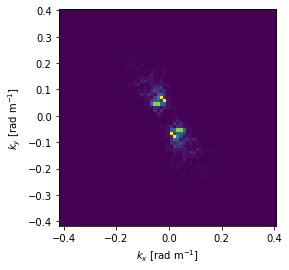

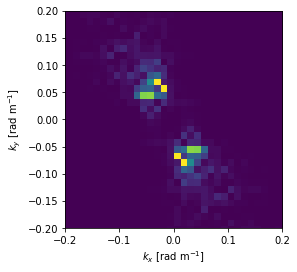

In [40]:
spec2d = surf2d.define_SpectralAnalysis()
# plot the symmetric 2d spectrum
spec2d.plot()
# plot the symmetric 2d spectrum for the given extent
spec2d.plot(extent=[-0.2,0.2,-0.2,0.2])
plt.show()

In [41]:
from wave_tools import shoaling_1d
dx = 0.5
x = np.arange(200, 2200+dx, dx)
g = 9.81
Tp = 10
fp = 1./Tp
gamma  = 3.3
Nf = 100
f_min = 0.001
f_max = 0.4
F = 300000

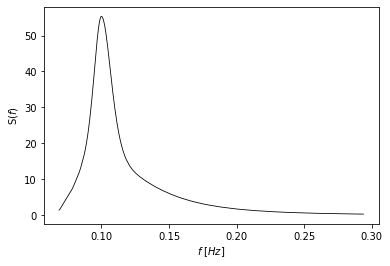

In [42]:
# Create a 1D spectrum and plot it
spec = shoaling_1d.Spectrum(Tp, gamma, F)
spec.plot()
plotting_interface.show()

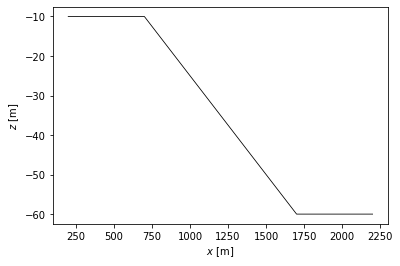

In [43]:
# Define bathymetry
b = shoaling_1d.Bathymetry(x, bathy_filename=None)
b.plot()
plotting_interface.show()

<AxesSubplot:xlabel='$t~\\mathrm{[s]}$', ylabel='$x~\\mathrm{[m]}$'>

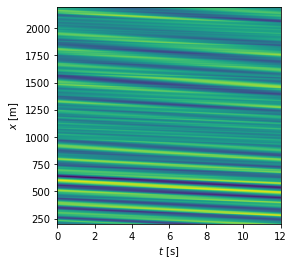

In [44]:
# Create a realization with random phases
realization = shoaling_1d.SpectralRealization(spec, f_min, f_max, Nf, dx)

# Construct wave field from spectrum
Nt = 120
Nx = len(x)
eta = np.zeros((Nt, Nx))
vel = np.zeros((Nt, Nx))
t = np.linspace(0, 12, Nt)

eta = realization.invert(b, t, x)
vel = realization.vel(eta, b,  t, x)
bsurf = surface_core.spacetempSurface('surfprofile', eta, [x, t])
bsurf.plot_3d_as_2d()

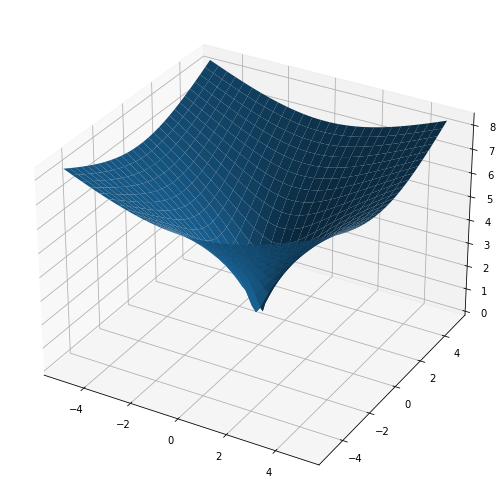

In [45]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
x = np.outer(np.linspace(-5, 5, 55), np.ones(55))
y = x.copy().T # transpose
z = np.sqrt( 9.8 * np.sqrt(x**2+y**2) )
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

 
# Creating plot
ax.plot_surface(x, y, z)
 
# show plot
plt.show()

In [46]:
x

array([[-5.        , -5.        , -5.        , ..., -5.        ,
        -5.        , -5.        ],
       [-4.81481481, -4.81481481, -4.81481481, ..., -4.81481481,
        -4.81481481, -4.81481481],
       [-4.62962963, -4.62962963, -4.62962963, ..., -4.62962963,
        -4.62962963, -4.62962963],
       ...,
       [ 4.62962963,  4.62962963,  4.62962963, ...,  4.62962963,
         4.62962963,  4.62962963],
       [ 4.81481481,  4.81481481,  4.81481481, ...,  4.81481481,
         4.81481481,  4.81481481],
       [ 5.        ,  5.        ,  5.        , ...,  5.        ,
         5.        ,  5.        ]])

In [47]:
np.tanh(2)

0.9640275800758169